# **MNIST Neural Network Classification**

## 1. Data Loading

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [20]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [21]:
print(f"Training Data Shape: {X_train.shape}")
# It should be (60000, 28, 28), unless something changes

Training Data Shape: (60000, 28, 28)


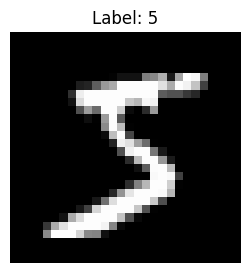

In [22]:
# Show first image as example
plt.figure(figsize=(3,3))
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

In [23]:
# See raw pixel values
print(X_train[0][14]) # Image is 28x28, so 14 is the middle

[  0   0   0   0   0   0   0   0   0   0   0   0   0  81 240 253 253 119
  25   0   0   0   0   0   0   0   0   0]


## 2. Data Preprocessing

In [24]:
# Normalize the values to 0-1.
# Values up to 255 will heavily skew results
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f"Max pixel value after normalization: {np.max(X_train)}")

Max pixel value after normalization: 1.0


## 3. Model Creation

In [25]:
# Use sequential model from Tensorflow
model = tf.keras.models.Sequential([
    # Layer 1: Flatten 2D images to 1D vector
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # Layer 2: Process the data with 128 neurons
    tf.keras.layers.Dense(128, activation='relu'),
    # Layer 3: Output of 10 digits
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

We are going to compile the model with these hyperparameters:
*   **Optimizer (`adam`)**: Algorithm that adjusts the weights automatically. 'Adam' is an industry standard.
*   **Loss (`sparse_categorical_crossentropy`)**: The loss function that calculates how far the guess was from the real answer. This one is used for categorical data.
*   **Metrics (`accuracy`)**: The specific metric we are paying attention to.

In [26]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# Start the training
history = model.fit(X_train, y_train,
                    epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8766 - loss: 0.4378
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9644 - loss: 0.1241
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9774 - loss: 0.0770
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9832 - loss: 0.0584
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9866 - loss: 0.0437


## 5. Model Testing and Evaluation

In [28]:
# Evaluate based on Test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")

Test Accuracy: 97.53%


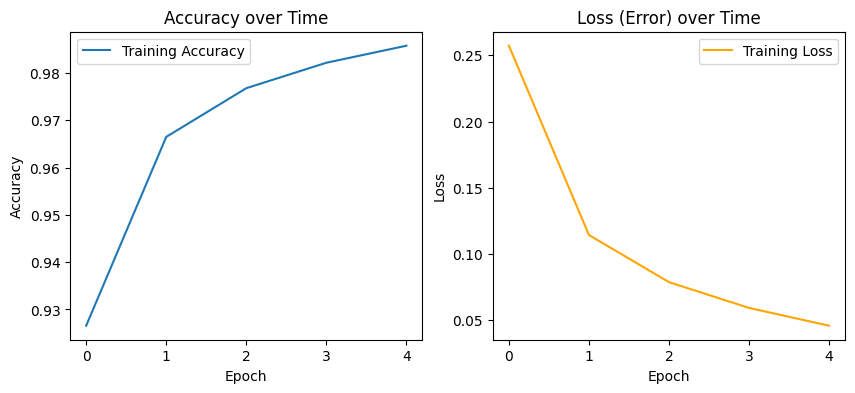

In [29]:
# Plot the learning curve
# To see how the model got smarter over the training
plt.figure(figsize=(10, 4))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Accuracy over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Subplot 2: Loss (Error)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='orange')
plt.title('Loss (Error) over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 6. Live Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


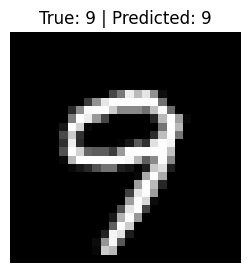

Model Confidence: 99.93%


In [30]:
import random

# 1. Choose a random image
random_idx = random.randint(0, len(X_test) - 1)
image = X_test[random_idx]
label = y_test[random_idx]

# 2. Predict
# Make sure to reshape the image to (1, 28, 28)
prediction_probs = model.predict(image.reshape(1,28,28))
predicted_digit = np.argmax(prediction_probs)

# 3. Show result
plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')
plt.title(f"True: {label} | Predicted: {predicted_digit}")
plt.axis('off')
plt.show()

# 4. Show model confidence
print(f"Model Confidence: {prediction_probs[0][predicted_digit]*100:.2f}%")